In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [2]:

df = pd.read_csv("spam.csv")

df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
X = df["text"]  
Y = df["label_num"]  

In [4]:
# Convert text to numerics using TfidfVectorization

vectorizer = TfidfVectorizer(stop_words="english", max_features=5000) 
X_transformed = vectorizer.fit_transform(X)  

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size=0.2, random_state=42)


##### Implementing Logistic Regression Model

In [6]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [7]:
Y_pred = model.predict(X_test)
Y_prob = model.predict_proba(X_test)[:, 1]

##### Confusion Matrix and F-1 Score

In [8]:
cm = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

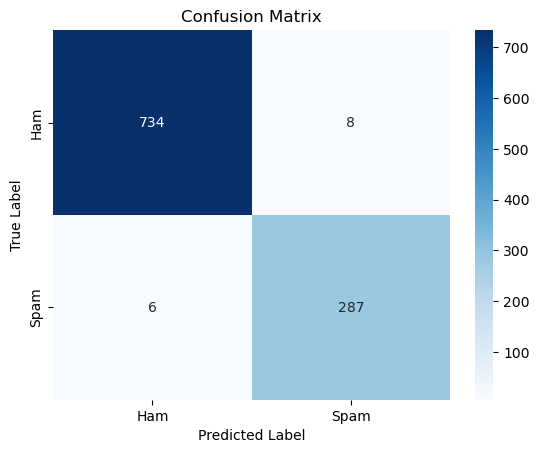

In [9]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")


In [10]:

classification_rep

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       742\n           1       0.97      0.98      0.98       293\n\n    accuracy                           0.99      1035\n   macro avg       0.98      0.98      0.98      1035\nweighted avg       0.99      0.99      0.99      1035\n'

##### ROC curve

In [11]:

fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

Text(0.5, 1.0, 'ROC Curve')

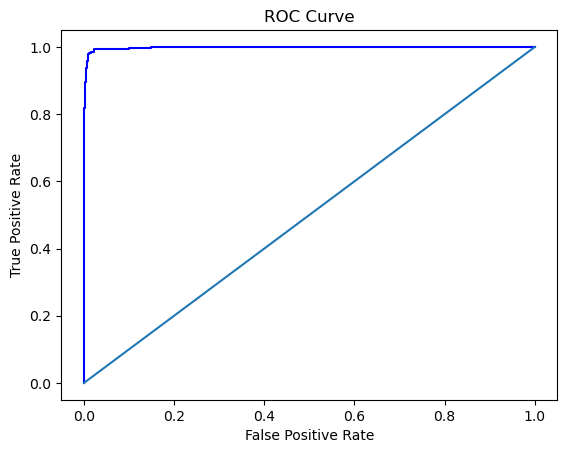

In [12]:
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1]) 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
